<a href="https://colab.research.google.com/github/urgetolearn/Reliability-Data-Analyzer/blob/main/Reliability_data_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib


=== Reliability Summary ===
Total Tests: 200
Passed: 155
Failed: 45
Reliability (%): 77.5


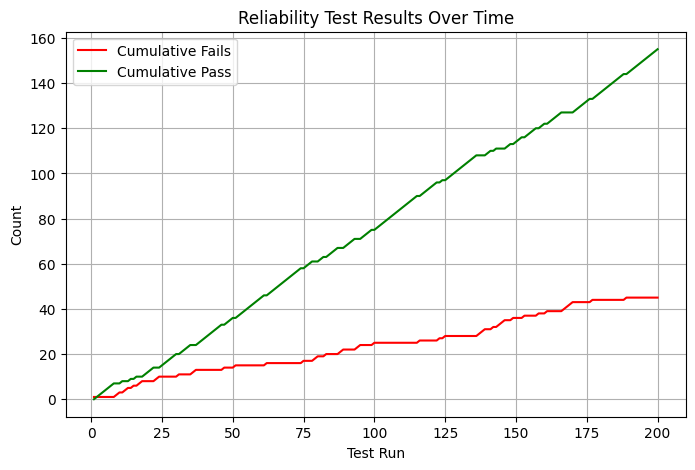

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_test_data(num_tests=200, pass_rate=0.8):
    np.random.seed(42)
    data = {
        "TestID": range(1, num_tests + 1),
        "RunTime": np.random.randint(10, 1000, num_tests),
        "Status": np.random.choice(["Pass", "Fail"], num_tests, p=[pass_rate, 1-pass_rate])
    }
    return pd.DataFrame(data)

def analyze_reliability(df):
    total_tests = len(df)
    passed = (df["Status"] == "Pass").sum()
    failed = (df["Status"] == "Fail").sum()
    reliability_percent = (passed / total_tests) * 100
    return {
        "Total Tests": total_tests,
        "Passed": passed,
        "Failed": failed,
        "Reliability (%)": round(reliability_percent, 2)
    }

def plot_results(df):
    df["CumulativeFails"] = (df["Status"] == "Fail").cumsum()
    df["CumulativePass"] = (df["Status"] == "Pass").cumsum()

    plt.figure(figsize=(8,5))
    plt.plot(df["TestID"], df["CumulativeFails"], label="Cumulative Fails", color="red")
    plt.plot(df["TestID"], df["CumulativePass"], label="Cumulative Pass", color="green")
    plt.title("Reliability Test Results Over Time")
    plt.xlabel("Test Run")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run analyzer
df = generate_test_data()
summary = analyze_reliability(df)

print("=== Reliability Summary ===")
for k, v in summary.items():
    print(f"{k}: {v}")

plot_results(df)
